# DECISION TREE #





A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes.
Decision Tree is used in Decision Analysis. Decision Tree Solves two types of problem which following as:


*   Regression Based Problems
*   Classification Based Problems



In [0]:
# DECISION TREE CLASSIFICATION 

In Decision Tree Classification we use diabetes dataset for Prediction.

First Download the dataset from kaggle.


In [0]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

In [41]:
# Read the csv file
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# To check the observation and faeture
df.shape

(768, 9)

In [43]:
# Here we separate the data into two parts one is our input and other is output where X is input and y is our output.
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [0]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [45]:
# Check the shape of our training and testing dataset
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


In [0]:
# Import Decision Tree Classifier for classification problem
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [0]:
# Fit the data
DTC = DTC.fit(X_train,y_train)
# for prediction
y_pred = DTC.predict(X_test)


In [0]:
# Check accuracy

In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.6883116883116883


In [0]:

## Visualize the decision tree

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

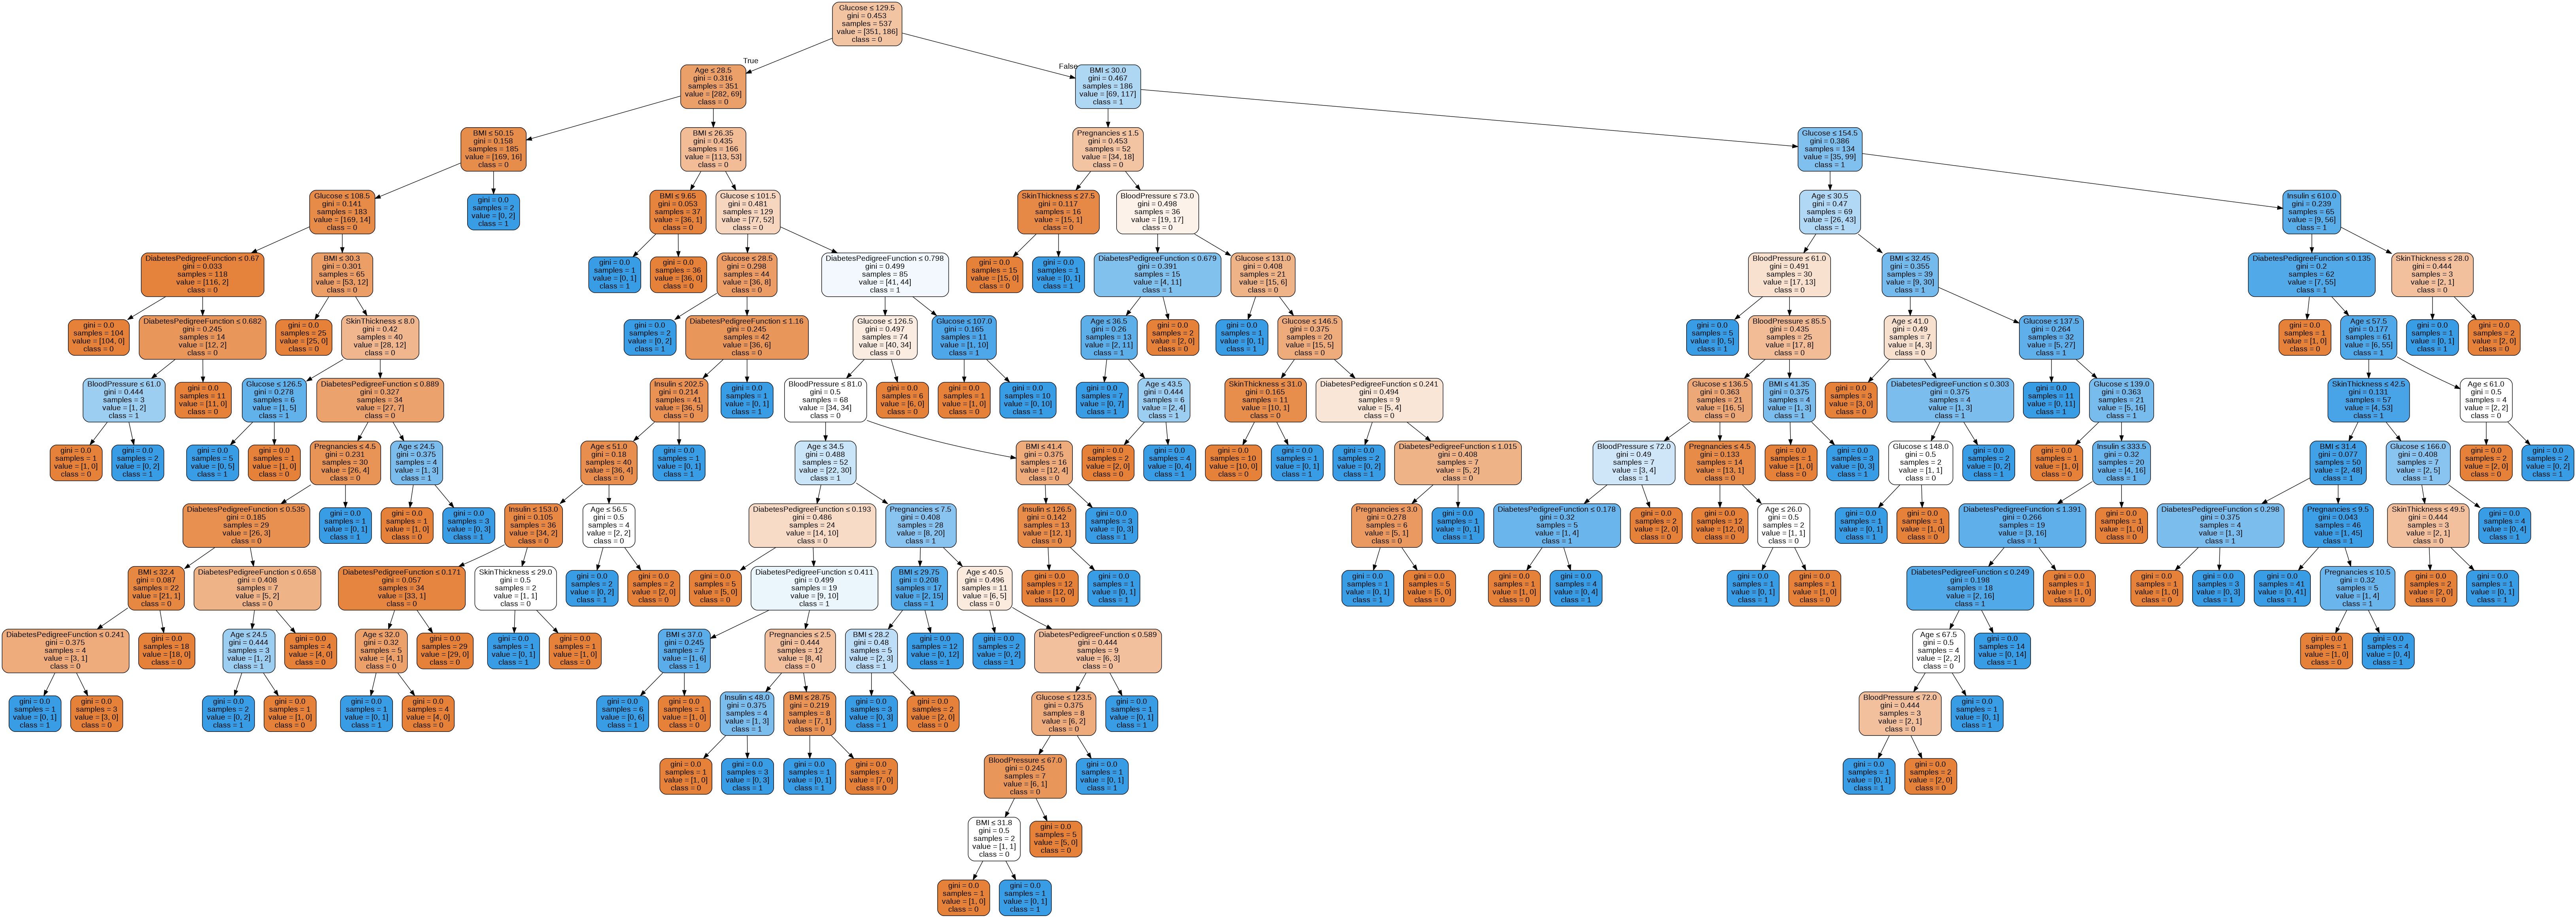

<Figure size 720x720 with 0 Axes>

In [52]:
plt.figure(figsize=(10,10))
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin',	'BMI','DiabetesPedigreeFunction','Age'], class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [0]:
# Optimize decision tree performance by using pruning # 
DTC = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
DTC = DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

In [54]:
# again check accuracy score
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.7489177489177489


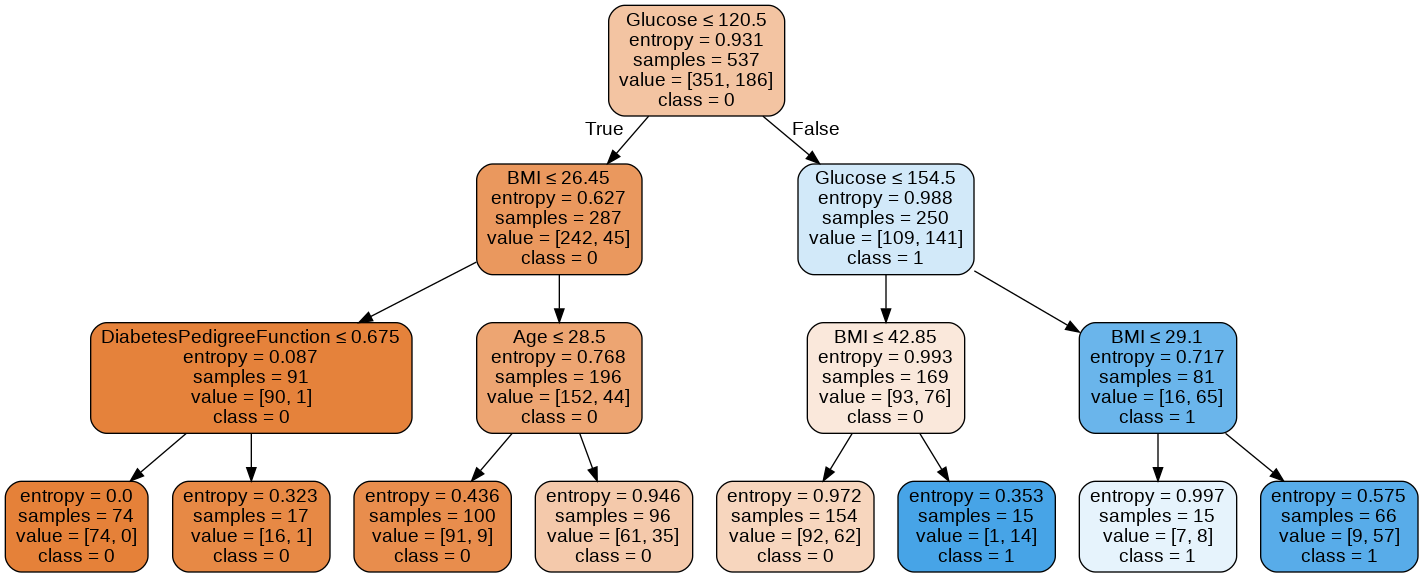

In [56]:
# again draw decision tree
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin',	'BMI','DiabetesPedigreeFunction','Age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())